# University Student Dropout Prediction Project

### Introduction
In this project, we aim to develop a machine learning model to predict the likelihood of university students dropping out in their first year of college. The challenge of student dropouts is a critical issue in higher education, impacting both the students' future and the educational institutions' effectiveness. Through predictive modeling, we seek to understand the key factors influencing dropout rates and identify at-risk students early in their academic journey.

### Project Objectives:

1. **Data Collection:** Acquire comprehensive and relevant datasets from universities, encompassing various factors like student demographics, academic records, engagement levels, and more.
2. **Data Preprocessing:** Clean and preprocess the data to ensure accuracy and reliability for our predictive analysis.
3. **Exploratory Data Analysis (EDA):** Perform in-depth analysis to uncover trends and insights within the data, guiding our feature selection and modeling approach.
4.  **Development:** Construct a predictive model utilizing mehtods such as Random Forest, XGBoost, Gradient Boosting, and Feed-forward Neural Networks, leveraging their combined strengths.
5. **Model Evaluation and Tuning:** Utilize relevant performance metrics to evaluate and refine the model, aiming for enhanced predictive accuracy and robustness.
6. **Interpretation and Reporting:** Interpret the results to provide meaningful insights and recommendations, focusing on strategies to improve student retention rates at the university level.

## 1. Data Collection:

**Sources Include:**
University requested student drop out data

## 2. Data Preprocessing

In [1]:
# Importing libraries

import pandas as pd
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/kflemming30/Student-Drop-Out-Prediction/main/OIR_Student%20Data%20Request.csv"
student_df = pd.read_csv(url)
student_df.head()


,PIDM,Cohort,SEX,Degree,Major 1,1st Year GPA,Dorm,1st Year Retention,College,Total Earned Hours,SAT,Major 2,Advisor
0,1,202109F,M,BS,Mechanical Engineering,2.49,Campion Hall,1,SEC,36,NaN,NaN,1.0
1,2,202109F,M,BS,Biology,3.18,Commuter,1,CAS,47,NaN,NaN,2.0
2,3,202109F,M,BS,Chemistry,2.86,Regis Hall,1,CAS,46,NaN,NaN,3.0
3,4,202109F,M,BS,DSB Undeclared,3.84,Gonzaga Hall,1,DSB,45,1300.0,NaN,4.0
4,5,202109F,M,BS,Management,2.69,Commuter,1,DSB,42,NaN,NaN,5.0


In [3]:
student_df.shape

(2584, 13)

In [4]:
student_df.columns

Index(['PIDM', 'Cohort', 'SEX', 'Degree', 'Major 1', '1st Year GPA', 'Dorm',
       '1st Year Retention', 'College', 'Total Earned Hours', 'SAT', 'Major 2',
       'Advisor'],
      dtype='object')

Cohort refers to the term students begin college. In this case our data contains September 2021, and september 2021, both are in the fall semester.

In [5]:
student_df['Cohort'].value_counts()

202209F    1328
202109F    1256
Name: Cohort, dtype: int64

In [6]:
# Columns with hardly any data won't be useful in the modeling
student_df = student_df.drop(['SAT', 'Major 2'], axis=1)

#Drop the leftover rows that have no GPA or Advisor
student_df = student_df.dropna()

student_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2575 entries, 0 to 2583
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PIDM                2575 non-null   int64  
 1   Cohort              2575 non-null   object 
 2   SEX                 2575 non-null   object 
 3   Degree              2575 non-null   object 
 4   Major 1             2575 non-null   object 
 5   1st Year GPA        2575 non-null   float64
 6   Dorm                2575 non-null   object 
 7   1st Year Retention  2575 non-null   int64  
 8   College             2575 non-null   object 
 9   Total Earned Hours  2575 non-null   int64  
 10  Advisor             2575 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 241.4+ KB


## 3. Exploratory Data Analysis (EDA)

In [11]:
student_df['1st Year Retention'].value_counts()
retention_rate = student_df['1st Year Retention'].value_counts(normalize=True) * 100
print(f"Fairfield's student retention rate is", retention_rate[1].round(2), "%")

Fairfield's student retention rate is 90.64 %


In [12]:
# Retention rate by College
student_df.groupby('College')['1st Year Retention'].mean()

College
CAS     0.894220
DSB     0.905694
EGAN    0.931398
SEC     0.922581
Name: 1st Year Retention, dtype: float64

In [19]:
# Group by Dorm and calculate mean retention, mean total earned hours, and mean 1st year GPA, along with counts
retention_mean_count = student_df.groupby('Dorm')['1st Year Retention'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)
earned_hours_mean = student_df.groupby('Dorm')['Total Earned Hours'].mean().sort_values(ascending=False)
gpa_mean = student_df.groupby('Dorm')['1st Year GPA'].mean().sort_values(ascending=False)

# Merge the three Series on Dorm
result = pd.concat([retention_mean_count, earned_hours_mean, gpa_mean], axis=1)

# Add clarity to column names
result.columns = ['Count of Students Retention', 'Mean 1st Year Retention', 'Mean Total Earned Hours', 'Mean 1st Year GPA']

result

,Count of Students Retention,Mean 1st Year Retention,Mean Total Earned Hours,Mean 1st Year GPA
Dorm,,,,
1036 North Benson Road,1,1.000000,36.000000,3.690000
Commuter,81,0.925926,46.802469,3.237531
Jogues Hall,619,0.922456,47.962843,3.443441
Campion Hall,493,0.920892,47.561866,3.319452
Gonzaga Hall,402,0.915423,45.101990,3.350896
Regis Hall,583,0.900515,44.780446,3.342607
Loyola Hall,394,0.860406,43.677665,3.352259
Claver Hall,2,0.500000,35.500000,3.510000


In [17]:
student_df.groupby(['College', 'Major 1'])['1st Year Retention'].agg(['mean', 'count']).sort_values(by='mean', ascending=True).head(10)

mean  count
College Major 1                                             
CAS     International Studies                0.769231     13
        Program on the Environment           0.800000     20
DSB     International Business               0.818182     22
        Information Systems & Ops Mgmt       0.818182     11
CAS     Politics                             0.825000     40
        Digital Journalism                   0.833333      6
        English                              0.840000     25
SEC     Electrical and Computer Engineering  0.846154     13
CAS     Mathematics                          0.846154     13
DSB     Economics                            0.846154     26

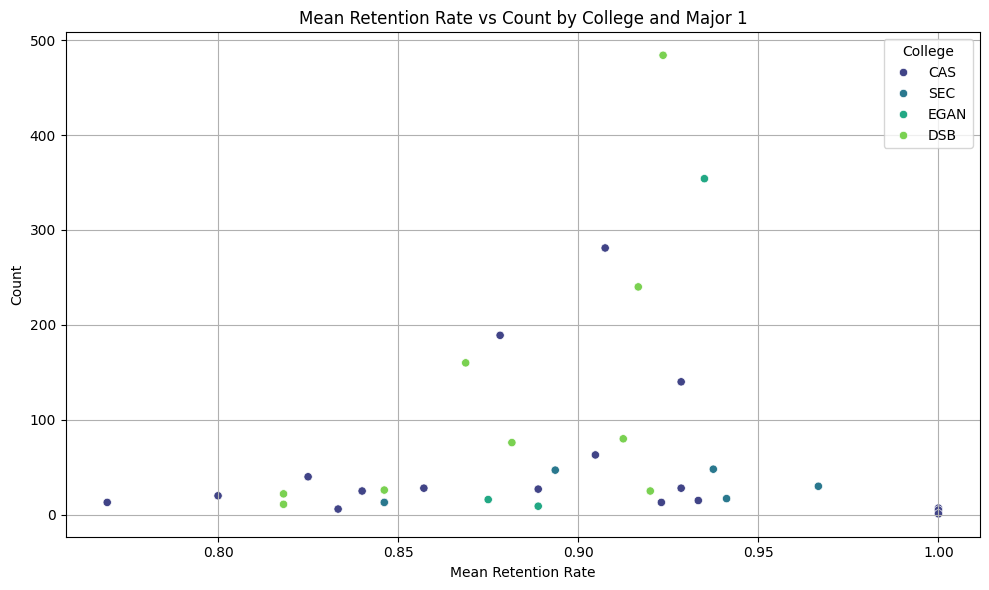

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by College and Major 1, calculate mean retention and count, then sort
grouped_data = student_df.groupby(['College', 'Major 1'])['1st Year Retention'].agg(['mean', 'count']).sort_values(by='mean', ascending=False).reset_index()

# Plotting the scatter plot with switched axes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=grouped_data, x='mean', y='count', hue='College', palette='viridis')

# Adding labels and title
plt.title('Mean Retention Rate vs Count by College and Major 1')
plt.xlabel('Mean Retention Rate')
plt.ylabel('Count')

# Show plot
plt.legend(title='College')
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
# Same chart interactive with Plotly
import plotly.express as px
import pandas as pd

# Group by College and Major 1, calculate mean retention and count, then sort
grouped_data = student_df.groupby(['College', 'Major 1'])['1st Year Retention'].agg(['mean', 'count']).sort_values(by='mean', ascending=False).reset_index()

# Convert pandas DataFrame to Plotly DataFrame
plotly_data = pd.DataFrame(grouped_data) 

# Plotly scatter plot
fig = px.scatter(plotly_data, x='mean', y='count', color='College', hover_data=['Major 1'], title='Mean Retention Rate vs Count by College and Major 1')
fig.update_traces(marker=dict(size=12, opacity=0.8))
fig.update_layout(xaxis_title='Mean Retention Rate', yaxis_title='Count', legend_title='College')
fig.show()


#### GPA distribution for drop outs and retained students

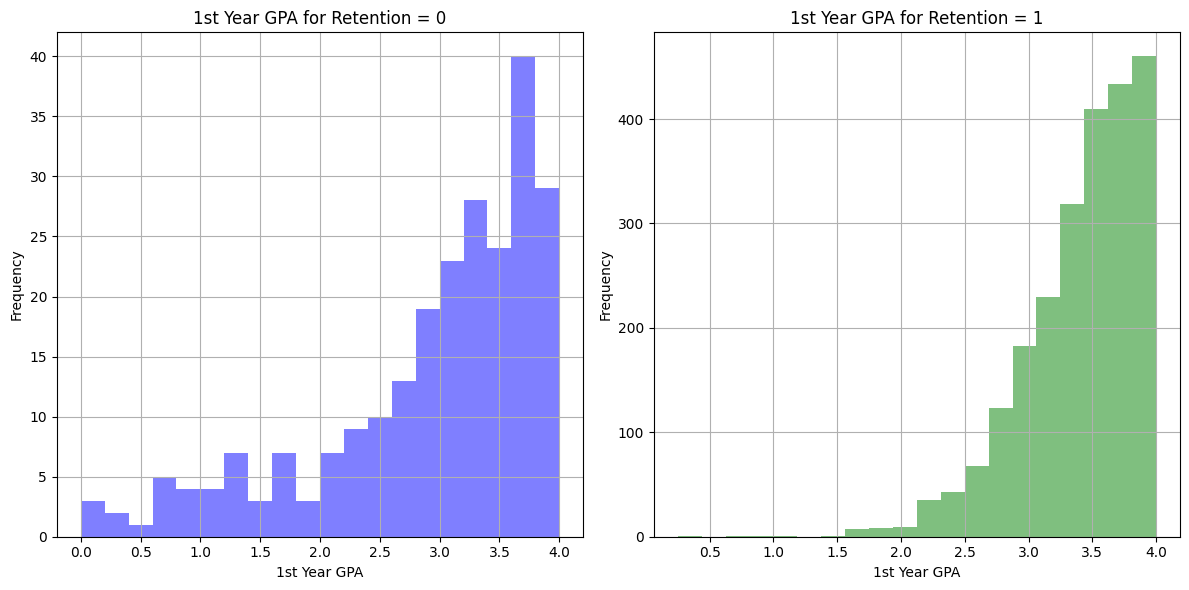

In [24]:
import matplotlib.pyplot as plt
# Filter for drop out and  and retained students
retention_0 = student_df[student_df['1st Year Retention'] == 0]['1st Year GPA']
retention_1 = student_df[student_df['1st Year Retention'] == 1]['1st Year GPA']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot histograms on separate axes
retention_0.hist(ax=axes[0], alpha=0.5, bins=20, color='blue')
retention_1.hist(ax=axes[1], alpha=0.5, bins=20, color='green')

# Adding titles and labels to the first subplot
axes[0].set_title('1st Year GPA for Retention = 0')
axes[0].set_xlabel('1st Year GPA')
axes[0].set_ylabel('Frequency')

# Adding titles and labels to the second subplot
axes[1].set_title('1st Year GPA for Retention = 1')
axes[1].set_xlabel('1st Year GPA')
axes[1].set_ylabel('Frequency')

# Layout adjustment to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

In [25]:
from scipy.stats import shapiro

# Test for normality using Shapiro-Wilk test
shapiro_0 = shapiro(retention_0.dropna())
shapiro_1 = shapiro(retention_1.dropna())

shapiro_0, shapiro_1


(ShapiroResult(statistic=0.8701900243759155, pvalue=1.918288797123427e-13),
 ShapiroResult(statistic=0.9135293364524841, pvalue=1.4884846449968472e-34))

In [26]:
from scipy.stats import levene

# Test for equal variances
levene_test = levene(retention_0.dropna(), retention_1.dropna())

levene_test

LeveneResult(statistic=203.88970057513572, pvalue=1.4264762411972885e-44)

The results suggest that the GPA data does not follow a normal distribution and does not exhibit homogeneity of variances. Therefore, we'll use the Mann-Whitney U test instead of the t-test for our analysis.

In [27]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U test
mwu_test = mannwhitneyu(retention_0.dropna(), retention_1.dropna())

mwu_test


MannwhitneyuResult(statistic=201295.5, pvalue=3.4323542242576273e-13)

The result confirms that there is a statistically significant difference between the distributions of GPA for retained students and those who dropped out.

#### Total Earned Hours distribution for drop outs and retained students

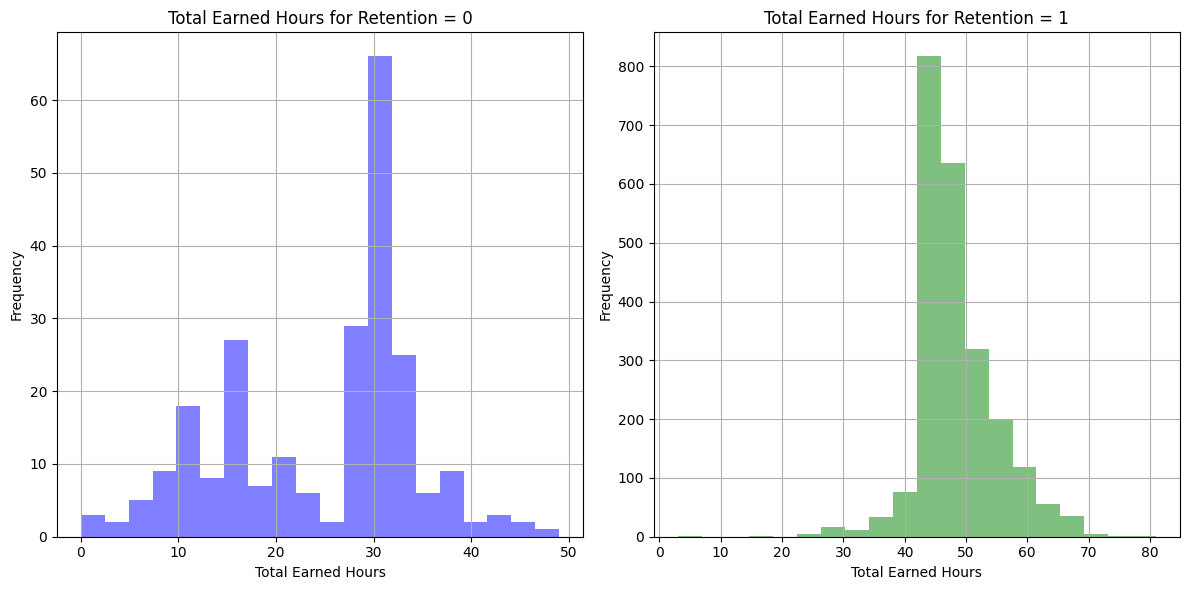

In [28]:
# Filter for 'Total Earned Hours' based on retention status
retention_hours_0 = student_df[student_df['1st Year Retention'] == 0]['Total Earned Hours']
retention_hours_1 = student_df[student_df['1st Year Retention'] == 1]['Total Earned Hours']

# Set up the figure and axes for plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot histograms on separate axes for each group
retention_hours_0.hist(ax=axes[0], alpha=0.5, bins=20, color='blue')
retention_hours_1.hist(ax=axes[1], alpha=0.5, bins=20, color='green')

# Adding titles and labels to the first subplot
axes[0].set_title('Total Earned Hours for Retention = 0')
axes[0].set_xlabel('Total Earned Hours')
axes[0].set_ylabel('Frequency')

# Adding titles and labels to the second subplot
axes[1].set_title('Total Earned Hours for Retention = 1')
axes[1].set_xlabel('Total Earned Hours')
axes[1].set_ylabel('Frequency')

# Layout adjustment to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


In [29]:
# Assuming you have a DataFrame named 'student_df'
retention_hours_0 = student_df[student_df['1st Year Retention'] == 0]['Total Earned Hours']
retention_hours_1 = student_df[student_df['1st Year Retention'] == 1]['Total Earned Hours']
# Normality test for each group
norm_test_0 = shapiro(retention_hours_0.dropna())
norm_test_1 = shapiro(retention_hours_1.dropna())

norm_test_0, norm_test_1

(ShapiroResult(statistic=0.9422091841697693, pvalue=3.6868588182414896e-08),
 ShapiroResult(statistic=0.9233483076095581, pvalue=6.268422808095699e-33))

In [30]:
# Variance equality test
variance_test = levene(retention_hours_0.dropna(), retention_hours_1.dropna())

variance_test

LeveneResult(statistic=92.44022936685066, pvalue=1.5888797127679914e-21)

In [32]:
# Mann-Whitney U test
mwu_test_hours = mannwhitneyu(retention_hours_0.dropna(), retention_hours_1.dropna())

mwu_test_hours

MannwhitneyuResult(statistic=7788.5, pvalue=1.0748202589022822e-138)

Confirmed significant difference again.

## 4. Model Development

In [73]:
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

from sklearn.model_selection import GridSearchCV

# models
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split



In [35]:
# Select categorical columns for one-hot encoding
categorical_cols = ['Cohort', 'SEX', 'Degree', 'Major 1', 'Dorm', 'College']

# Perform one-hot encoding
student_df_encoded = pd.get_dummies(student_df, columns=categorical_cols)

student_df_encoded.shape

(2575, 60)

In [36]:
student_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2575 entries, 0 to 2583
Data columns (total 60 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   PIDM                                         2575 non-null   int64  
 1   1st Year GPA                                 2575 non-null   float64
 2   1st Year Retention                           2575 non-null   int64  
 3   Total Earned Hours                           2575 non-null   int64  
 4   Advisor                                      2575 non-null   float64
 5   Cohort_202109F                               2575 non-null   uint8  
 6   Cohort_202209F                               2575 non-null   uint8  
 7   SEX_F                                        2575 non-null   uint8  
 8   SEX_M                                        2575 non-null   uint8  
 9   Degree_BA                                    2575 non-null   uint8  
 10  

In [38]:
student_df_encoded['1st Year Retention'].value_counts()

1    2334
0     241
Name: 1st Year Retention, dtype: int64

In [40]:
features = student_df_encoded.columns[(student_df_encoded.columns != 'PIDM') & (student_df_encoded.columns != '1st Year Retention')]
target = "1st Year Retention"

X = student_df_encoded[features]
y = student_df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2060, 58), (2060,), (515, 58), (515,))

In [41]:
from sklearn import metrics

def train_test2(X_train, X_test, y_train, y_test, param_grid, clf):
    clf.fit(X_train, y_train)

    print("*** Parameter estimation results: ")
    print(clf.cv_results_)
    print()

    print("*** Grid scores: ")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    params = clf.cv_results_['params']

    for mean, std, param in zip(means, stds, params):
        print(f"{round(mean, 3)} (+/-{round(std*2, 3)}) for {param}")
    print()

    print("*** Highest accuracy score: ")
    print(f"{round(clf.best_score_, 3)}")
    print()

    print("*** Best parameters set found: ")
    print(clf.best_params_)
    print()

    y_true, y_pred = y_test, clf.predict(X_test)

    print("*** Classification report for the best parameters set: ")
    print(metrics.classification_report(y_true, y_pred))
    print()

    print("*** Confusion matrix for the best parameters set: ")
    print(metrics.confusion_matrix(y_true, y_pred))
    print()

    print("*** Final accuracy score: ")
    test_score = round(clf.score(X_test, y_test), 3)
    print(test_score)

    return clf, test_score

In [86]:
cv = 5
summary = dict()

important_features = dict()

### KNN

In [75]:
param_grid = [{"n_neighbors": [1, 3, 10, 30, 100]}]

knc = GridSearchCV(KNeighborsClassifier(), param_grid, cv=cv)

knc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, knc)

summary["k-NNs"] = score
summary


*** Parameter estimation results: 
{'mean_fit_time': array([0.00130043, 0.00514736, 0.00142941, 0.00079956, 0.00654497]), 'std_fit_time': array([0.00107785, 0.00512651, 0.00127291, 0.00097926, 0.00801801]), 'mean_score_time': array([0.03498015, 0.02364078, 0.02284679, 0.02495131, 0.0234354 ]), 'std_score_time': array([0.01035948, 0.00548989, 0.00468809, 0.00824825, 0.00833004]), 'param_n_neighbors': masked_array(data=[1, 3, 10, 30, 100],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 1}, {'n_neighbors': 3}, {'n_neighbors': 10}, {'n_neighbors': 30}, {'n_neighbors': 100}], 'split0_test_score': array([0.97572816, 0.98058252, 0.97572816, 0.96601942, 0.92718447]), 'split1_test_score': array([0.97330097, 0.98058252, 0.97815534, 0.96359223, 0.92475728]), 'split2_test_score': array([0.97572816, 0.97087379, 0.97330097, 0.94902913, 0.91262136]), 'split3_test_score': array([0.97087379, 0.96116505, 0.96359223, 0.9

{'k-NNs': 0.977,
 'Logistic Regression': 0.981,
 'Decision Trees': 0.984,
 'Random Forest': 0.984,
 'XGBoost': 0.984,
 'Linear SVMs': 0.984,
 'Kernelized SVMs': 0.979,
 'Neural Networks': 0.981}

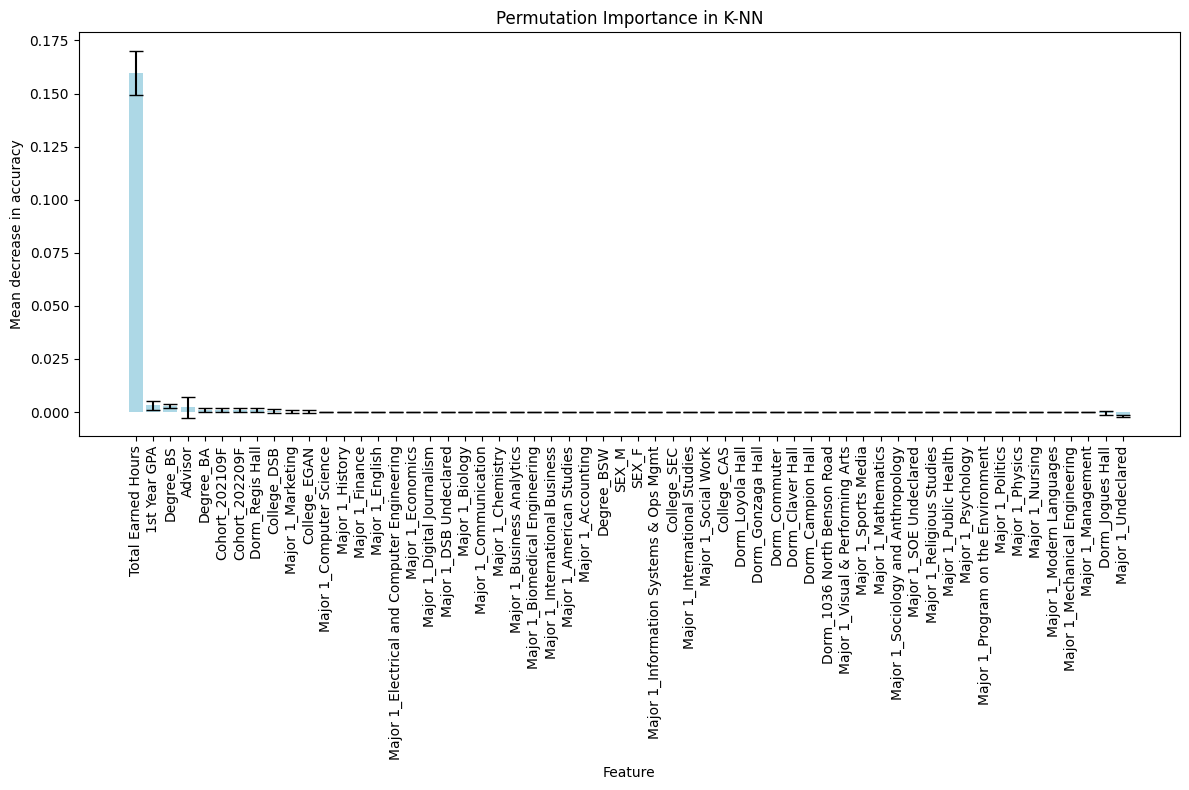

In [87]:
# permutation importance
feature_names = X.columns if hasattr(X, 'columns') else ['Feature {}'.format(i) for i in range(X.shape[1])]

# Results from permutation importance
results = permutation_importance(knc, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
importances = results.importances_mean
std = results.importances_std

# Sort features by importance
indices = np.argsort(importances)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]

plt.figure(figsize=(12, 8))
plt.bar(range(len(importances)), importances[indices], yerr=std[indices], align='center', color='lightblue', capsize=5)
plt.xticks(range(len(importances)), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Mean decrease in accuracy')
plt.title('Permutation Importance in K-NN')
plt.tight_layout()
plt.show()

# Most important feature
max_coef_index = np.argmax(np.abs(importances))
most_important_feature = features[max_coef_index]
most_important_value = importances[max_coef_index]
important_features['K-NN'] = (most_important_feature, most_important_value)

### Logistic Regression

In [47]:
param_grid = [{"C": [0.01, 0.03, 0.1, 0.3, 1, 3, 10], "solver": ["lbfgs", "liblinear"]}]

from sklearn.linear_model import LogisticRegression

lr = GridSearchCV(LogisticRegression(), param_grid, cv=cv)
lr, score = train_test2(X_train, X_test, y_train, y_test, param_grid, lr)
summary["Logistic Regression"] = score
summary

C:\Users\nfs25\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\nfs25\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Plea

*** Parameter estimation results: 
{'mean_fit_time': array([0.07915916, 0.01135702, 0.07261348, 0.00673885, 0.07878957,
       0.00845528, 0.09842081, 0.01024771, 0.0774272 , 0.00901752,
       0.08749518, 0.01226473, 0.08429513, 0.01053433]), 'std_fit_time': array([0.03453773, 0.00801324, 0.01001283, 0.00606701, 0.00635187,
       0.00725157, 0.00895715, 0.00660069, 0.00464079, 0.00647912,
       0.02202547, 0.0057036 , 0.00861765, 0.00721671]), 'mean_score_time': array([0.00189009, 0.        , 0.00074911, 0.00651398, 0.00184293,
       0.00317907, 0.00241346, 0.00309844, 0.0022028 , 0.00151548,
       0.00245161, 0.0012455 , 0.00407152, 0.00247679]), 'std_score_time': array([0.00195569, 0.        , 0.00149822, 0.00601676, 0.0015416 ,
       0.00390237, 0.00320599, 0.00452368, 0.0022902 , 0.00253505,
       0.00409724, 0.002491  , 0.00403005, 0.00344844]), 'param_C': masked_array(data=[0.01, 0.01, 0.03, 0.03, 0.1, 0.1, 0.3, 0.3, 1, 1, 3, 3,
                   10, 10],
             mas

C:\Users\nfs25\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\nfs25\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Plea

{'k-NNs': 0.977, 'Logistic Regression': 0.981}

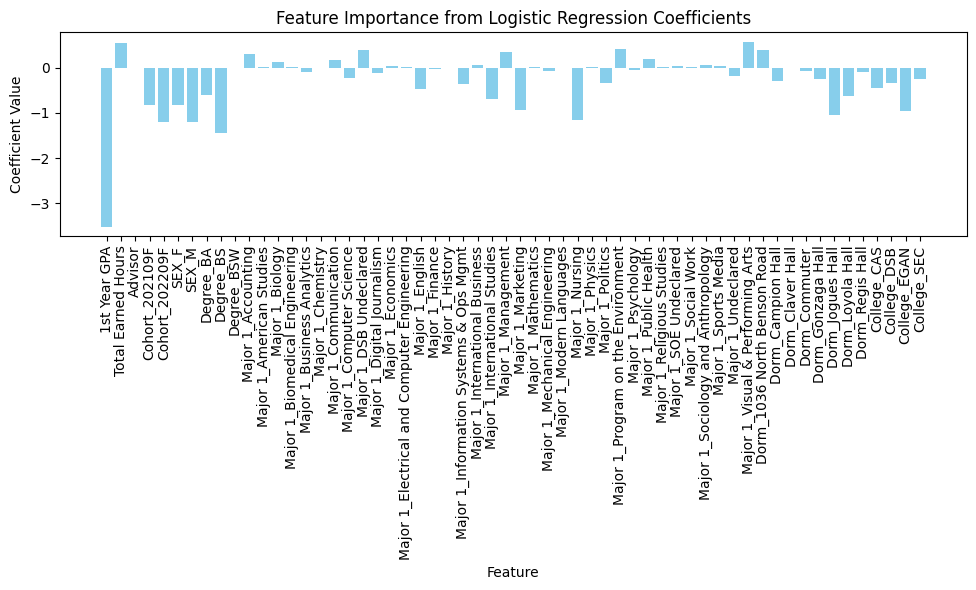

In [89]:
feature_names = X.columns if hasattr(X, 'columns') else ['Feature {}'.format(i) for i in range(X.shape[1])]

best_log_reg = lr.best_estimator_
coefficients_lr = best_log_reg.coef_[0]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), coefficients_lr, color='skyblue')
plt.xticks(range(X.shape[1]), feature_names, rotation=90)  
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance from Logistic Regression Coefficients')
plt.tight_layout()
plt.show()

# Most important feature
max_coef_index = np.argmax(np.abs(coefficients_lr))
most_important_feature = features[max_coef_index]
most_important_value = coefficients_lr[max_coef_index]
important_features['Logistic Regression'] = (most_important_feature, most_important_value)

### Decision Tree

*** Parameter estimation results: 
{'mean_fit_time': array([0.00389128, 0.00296206, 0.00275168, 0.00554776]), 'std_fit_time': array([0.00124526, 0.0004576 , 0.00233775, 0.00503022]), 'mean_score_time': array([0.00104337, 0.00083375, 0.0026958 , 0.00044627]), 'std_score_time': array([0.00093572, 0.00042185, 0.00440669, 0.0005466 ]), 'param_max_depth': masked_array(data=[1, 3, 10, None],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 1}, {'max_depth': 3}, {'max_depth': 10}, {'max_depth': None}], 'split0_test_score': array([0.98058252, 0.97815534, 0.97087379, 0.9684466 ]), 'split1_test_score': array([0.98058252, 0.98543689, 0.97815534, 0.97572816]), 'split2_test_score': array([0.9684466 , 0.98058252, 0.98300971, 0.98300971]), 'split3_test_score': array([0.97087379, 0.97087379, 0.97572816, 0.97572816]), 'split4_test_score': array([0.98543689, 0.97572816, 0.97572816, 0.97572816]), 'mean_test_score': array([0.9771844

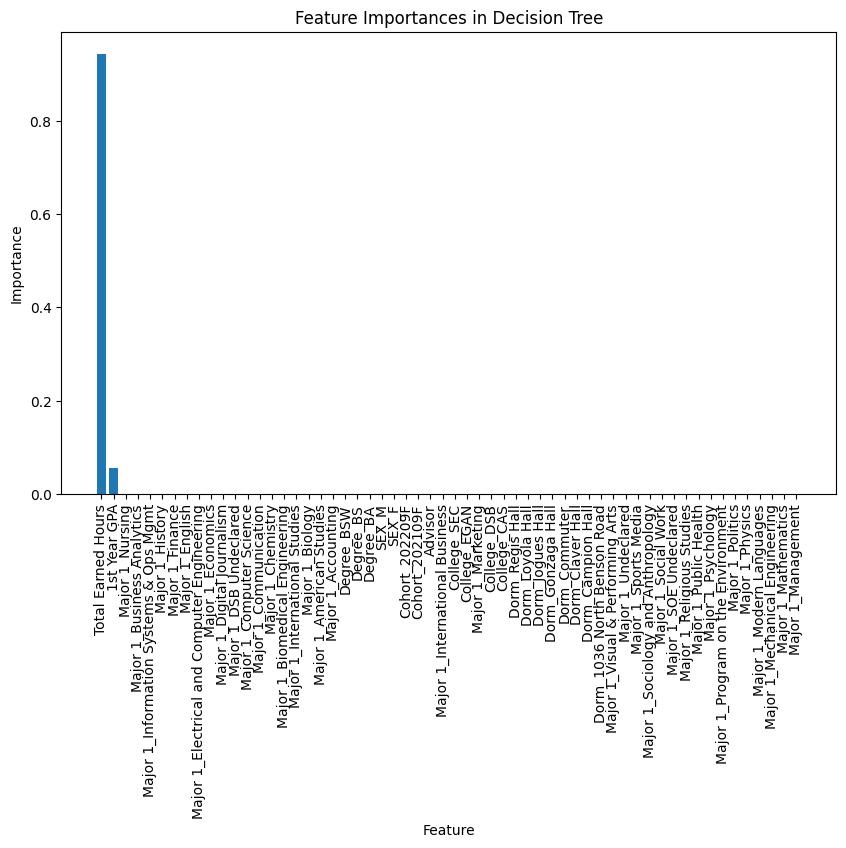

In [95]:
param_grid = [{"max_depth": [1, 3, 10, None]}]

from sklearn.tree import DecisionTreeClassifier

dtc = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=cv)
dtc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, dtc)
summary["Decision Trees"] = score
summary


best_log_reg = dtc.best_estimator_
importances = best_log_reg.feature_importances_

indices = np.argsort(importances)[::-1]

sorted_feature_names = [feature_names[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances in Decision Tree')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# Most important feature
max_coef_index = np.argmax(np.abs(importances))
most_important_feature = features[max_coef_index]
most_important_value = importances[max_coef_index]
important_features['Decision Tree'] = (most_important_feature, most_important_value)


In [ ]:
from scipy.stats import shapiro

# Test for normality using Shapiro-Wilk test
shapiro_0 = shapiro(retention_0.dropna())
shapiro_1 = shapiro(retention_1.dropna())

shapiro_0, shapiro_1


(ShapiroResult(statistic=0.8701900243759155, pvalue=1.918288797123427e-13),
 ShapiroResult(statistic=0.9135293364524841, pvalue=1.4884846449968472e-34))

### Random Forest

*** Parameter estimation results: 
{'mean_fit_time': array([0.00409555, 0.00408187, 0.00843353, 0.02131839, 0.06395788,
       0.17283735, 0.6741148 , 0.00436258, 0.00672278, 0.0160964 ,
       0.03499351, 0.08612881, 0.24333835, 0.83542199, 0.00310636,
       0.00484133, 0.02192264, 0.04121442, 0.14553628, 0.42610774,
       1.33103476, 0.0019556 , 0.00868855, 0.01796546, 0.04002304,
       0.14421377, 0.4258347 , 1.52096057]), 'std_fit_time': array([0.00272079, 0.00096417, 0.00617218, 0.00493872, 0.0061393 ,
       0.00673881, 0.01175317, 0.00512889, 0.00372113, 0.00226877,
       0.00349056, 0.00721515, 0.01029853, 0.03776084, 0.00621271,
       0.00671007, 0.00465651, 0.00642241, 0.0069108 , 0.01330817,
       0.06170484, 0.00249807, 0.00734225, 0.00598888, 0.00731047,
       0.00564889, 0.01311094, 0.09150679]), 'mean_score_time': array([0.00144482, 0.00115852, 0.00063505, 0.00084033, 0.00155745,
       0.01278253, 0.02928419, 0.00067859, 0.00179358, 0.00128574,
       0.0014513 ,

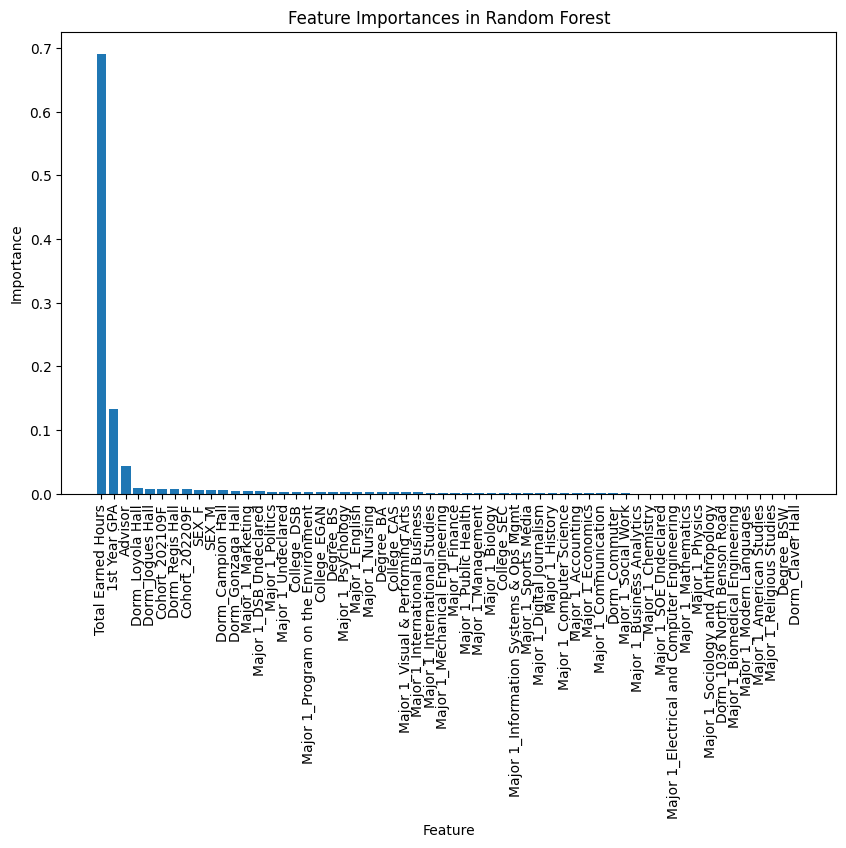

In [97]:
param_grid = [
    {"n_estimators": [1, 3, 10, 30, 100, 300, 1000], "max_depth": [1, 3, 10, None]}
]

from sklearn.ensemble import RandomForestClassifier
# Setup GridSearchCV
rfc = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=cv)

# Assuming the existence of a train_test2 function that trains the model and returns the model and score
rfc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, rfc)
summary["Random Forest"] = score

# Extract the best estimator
best_rfc = rfc.best_estimator_

# Get feature importances
importances = best_rfc.feature_importances_
indices = np.argsort(importances)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances in Random Forest')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# Most important feature
max_coef_index = np.argmax(importances)
most_important_feature = feature_names[max_coef_index]
most_important_value = importances[max_coef_index]
important_features['Random Forest'] = (most_important_feature, most_important_value)

In [98]:
important_features

{'K-NN': ('Total Earned Hours', 0.15980582524271847),
 'Logistic Regression': ('1st Year GPA', -3.5156512966098714),
 'Decision Tree': ('Total Earned Hours', 0.9441238919477092),
 'Random Forest': ('Total Earned Hours', 0.6909530884866595)}

### XGBoost

*** Parameter estimation results: 
{'mean_fit_time': array([0.09181423, 0.08278232, 0.07378578, 0.08014393, 0.07085161,
       0.07621088, 0.05434237, 0.04279895, 0.04005432]), 'std_fit_time': array([0.00758434, 0.01543202, 0.01467127, 0.0068259 , 0.0064947 ,
       0.00776589, 0.00618625, 0.00824291, 0.00816618]), 'mean_score_time': array([0.00656791, 0.00535111, 0.00780072, 0.00635839, 0.00881519,
       0.00361109, 0.00341649, 0.01272497, 0.00644679]), 'std_score_time': array([0.00684771, 0.0068845 , 0.00752821, 0.00778958, 0.0073318 ,
       0.00693439, 0.00651392, 0.00669944, 0.00790513]), 'param_reg_alpha': masked_array(data=[0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'params': [{'reg_alpha': 0.001}, {'reg_alpha': 0.003}, {'reg_alpha': 0.01}, {'reg_alpha': 0.03}, {'reg_alpha': 0.1}, {'reg_alpha': 0.3}, {'reg_alpha': 1}, {'reg_

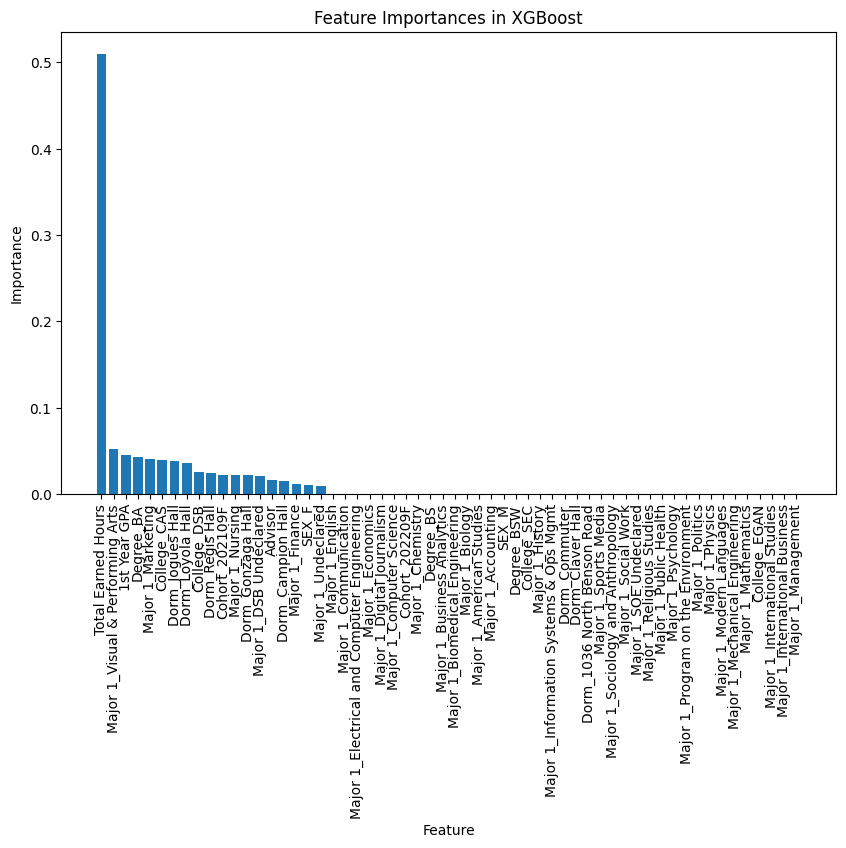

In [99]:
param_grid = [
    {"reg_alpha": [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]}
]

from xgboost import XGBClassifier

xgbc = GridSearchCV(XGBClassifier(random_state=0), param_grid, cv=cv)

xgbc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, xgbc)
summary["XGBoost"] = score

best_xgbc = xgbc.best_estimator_

importances = best_xgbc.feature_importances_
indices = np.argsort(importances)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances in XGBoost')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

max_coef_index = np.argmax(importances)
most_important_feature = feature_names[max_coef_index]
most_important_value = importances[max_coef_index]
important_features['XGBoost'] = (most_important_feature, most_important_value)

### Linear SVMs

In [101]:
from sklearn.svm import LinearSVC

param_grid = [
    {"C": [0.01, 0.03, 0.1, 0.3, 1, 3, 10]}
]

lsvc = GridSearchCV(LinearSVC(random_state=0, max_iter=10000), param_grid, cv=cv)

lsvc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, lsvc)
summary["Linear SVMs"] = score

best_lsvc = lsvc.best_estimator_

if hasattr(best_lsvc, "coef_"):
    importances = best_lsvc.coef_[0]
    indices = np.argsort(np.abs(importances))[::-1]
    sorted_feature_names = [feature_names[i] for i in indices]

    max_coef_index = indices[0]
    most_important_feature = feature_names[max_coef_index]
    most_important_value = importances[max_coef_index]
    important_features['Linear SVM'] = (most_important_feature, most_important_value)


C:\Users\nfs25\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

C:\Users\nfs25\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

C:\Users\nfs25\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

C:\Users\nfs25\AppData\Local\Packages\PythonSoftware

*** Parameter estimation results: 
{'mean_fit_time': array([0.05645585, 0.07396698, 0.07875152, 0.07282658, 0.06758475,
       0.08047833, 0.08263426]), 'std_fit_time': array([0.00505121, 0.00769528, 0.00898809, 0.01007301, 0.01463255,
       0.01514189, 0.0179755 ]), 'mean_score_time': array([0.00039916, 0.00346379, 0.00177112, 0.00060458, 0.00483427,
       0.00013003, 0.00384545]), 'std_score_time': array([0.00079832, 0.0064369 , 0.00147814, 0.00120916, 0.00683281,
       0.00026007, 0.00343035]), 'param_C': masked_array(data=[0.01, 0.03, 0.1, 0.3, 1, 3, 10],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.01}, {'C': 0.03}, {'C': 0.1}, {'C': 0.3}, {'C': 1}, {'C': 3}, {'C': 10}], 'split0_test_score': array([0.97572816, 0.98786408, 0.98786408, 0.98543689, 0.98058252,
       0.98300971, 0.98300971]), 'split1_test_score': array([0.97815534, 0.98786408, 0.98786408, 0.98300971, 0.98786408,
       0.9

C:\Users\nfs25\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\nfs25\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

C:\Users\nfs25\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



### Kernelized SVMs

In [52]:
param_grid = [{"C": [0.01, 0.03, 0.1, 0.3, 1, 3, 10], "gamma": ["scale", "auto", 0.01, 0.03, 0.1, 0.3, 1, 3, 10]}]

from sklearn.svm import SVC

svc = GridSearchCV(SVC(random_state=0), param_grid, cv=cv)
svc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, svc)
summary["Kernelized SVMs"] = score
summary

*** Parameter estimation results: 
{'mean_fit_time': array([0.03156528, 0.0459671 , 0.03951464, 0.04759841, 0.10887527,
       0.1958056 , 0.23151979, 0.24779062, 0.22146392, 0.03455386,
       0.04712591, 0.03141646, 0.05666704, 0.14163904, 0.18398523,
       0.23829532, 0.24748507, 0.22572465, 0.02384706, 0.05633597,
       0.04437323, 0.08683648, 0.22788758, 0.32839179, 0.35558996,
       0.3762949 , 0.39407954, 0.04936094, 0.09372163, 0.06268344,
       0.13152103, 0.26054583, 0.36286449, 0.43661923, 0.29875994,
       0.46589627, 0.04292746, 0.09466219, 0.06096106, 0.1255898 ,
       0.29918823, 0.39192472, 0.39277372, 0.40256715, 0.37844343,
       0.04051805, 0.08210254, 0.06004453, 0.11077394, 0.30329666,
       0.38223777, 0.45247951, 0.45494099, 0.50269489, 0.05512052,
       0.09259238, 0.07512078, 0.13782768, 0.38099847, 0.50622807,
       0.54889536, 0.56898813, 0.54803104]), 'std_fit_time': array([0.01166987, 0.0062057 , 0.00433838, 0.00645401, 0.01079006,
       0.012299

{'k-NNs': 0.977,
 'Logistic Regression': 0.981,
 'Decision Trees': 0.984,
 'Random Forest': 0.984,
 'XGBoost': 0.984,
 'Linear SVMs': 0.984,
 'Kernelized SVMs': 0.979}

### Neural Networks

In [53]:
param_grid = [{"hidden_layer_sizes": [(10,), (30,), (100,)], "solver": ["lbfgs", "sgd", "adam"]}]

from sklearn.neural_network import MLPClassifier

mlpc = GridSearchCV(MLPClassifier(random_state=0), param_grid, cv=cv)
mlpc, score = train_test2(X_train, X_test, y_train, y_test, param_grid, mlpc)
summary["Neural Networks"] = score
summary

C:\Users\nfs25\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Users\nfs25\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Users\nfs25\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\s

*** Parameter estimation results: 
{'mean_fit_time': array([ 1.83150487,  1.60934434,  1.85564885,  1.88040748,  4.17730169,
        5.32407279,  3.75163002,  8.87876248, 12.22650728]), 'std_fit_time': array([0.35071336, 0.04258173, 0.08756201, 0.31147583, 0.31555638,
       0.43768422, 0.22816883, 1.02554859, 6.67271003]), 'mean_score_time': array([0.00751176, 0.00882497, 0.00583186, 0.00601802, 0.00725069,
       0.00802431, 0.00349407, 0.00411515, 0.00417199]), 'std_score_time': array([0.00723243, 0.00820367, 0.0058448 , 0.00593843, 0.00644066,
       0.00770632, 0.00698814, 0.00623134, 0.00606092]), 'param_hidden_layer_sizes': masked_array(data=[(10,), (10,), (10,), (30,), (30,), (30,), (100,),
                   (100,), (100,)],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_solver': masked_array(data=['lbfgs', 'sgd', 'adam', 'lbfgs', 'sgd', 'adam',
                   'l

C:\Users\nfs25\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



{'k-NNs': 0.977,
 'Logistic Regression': 0.981,
 'Decision Trees': 0.984,
 'Random Forest': 0.984,
 'XGBoost': 0.984,
 'Linear SVMs': 0.984,
 'Kernelized SVMs': 0.979,
 'Neural Networks': 0.981}

## Compare and choose model

In [54]:
summary

{'k-NNs': 0.977,
 'Logistic Regression': 0.981,
 'Decision Trees': 0.984,
 'Random Forest': 0.984,
 'XGBoost': 0.984,
 'Linear SVMs': 0.984,
 'Kernelized SVMs': 0.979,
 'Neural Networks': 0.981}

All of our models are very close to 1, which is cause for concern that one or more of our features is a telltale sign of retention. We will now look at the feature importances for many of the models.

## Feature Importance

In [105]:
important_features

{'K-NN': ('Total Earned Hours', 0.15980582524271847),
 'Logistic Regression': ('1st Year GPA', -3.5156512966098714),
 'Decision Tree': ('Total Earned Hours', 0.9441238919477092),
 'Random Forest': ('Total Earned Hours', 0.6909530884866595),
 'XGBoost': ('Total Earned Hours', 0.5098825),
 'Linear SVM': ('1st Year GPA', -0.9718853474823551)}

Total Earned Hours and 1st Year GPA are the top indicators in our models. We did not get feature importances from all of our models as not all support feature importances. There was enough evidence to adjust our features.

We will now adjust our data by removing these features an see how this effect our model accuracy. 